In [1]:
# Imports

import random
import timeit
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
def processdata(li):
    for i in range(len(li)):
        if li[i] > 5:
            for j in range(len(li)):
                li[i] *= 2

## Complexity Analysis

The worst case complexity is $O(n^2)$. This would require all the elements in `li` to be greater than 5 as the second `for` loop will always run.

The best case complexity is $O(n)$. This case would require all the elements in `li` to be less than 5 as the second `for` loop will never run.

The average case complexiy is $O(n^2)$. This case could occur if all the elements in `li` were random. In this case, the second for loop will run randomly.

The average, best and worst case are not the same. However, we can easily modify the code to fit this requirement.

In [3]:
def processdata(li):
    for i in range(len(li)):
        for j in range(len(li)):
            li[i] *= 2

## Searching in a sorted array

In [4]:
# Implement binary search
def efficient(arr, low, high, key):
    '''
    Requires:
    * an array
    * the lower bound index of the searching area (default is 0)
    * the upper bound index of the searching area (default is len(arr) - 1)
    * a key to be found

    Promises:
    * the index of the key if found, else `None`
    '''
     
    # Check base case
    if high >= low:
        mid = (high + low) // 2
        
        # If element is present at the middle itself
        if arr[mid] == key:
            return mid
        # be present in left subarray
        elif arr[mid] > key:
            return efficient(arr, low, mid - 1, key)
        else:
            return efficient(arr, mid + 1, high, key)
    else:
        return None

# Implement linear search
def inefficient(arr, key):
    '''
    Requires:
    * an array
    * a key to be found

    Promises:
    * the index of the key if found, else `None`
    '''

    for i in range(len(arr)):
        if arr[i] == key:
            return i
    return None

The worst-case complexity of the efficient search is $O(log n)$ because it is basically a binary search implementation.\
The worst-case complexity of the inefficient search is $O(n)$ because it is basically a linear search implementation.

## Benchmarking

In [23]:
# Generating sizes

sizes = [i for i in range(1_000, 10_000, 200)]

In [24]:
def measureEfficient(size):
    array = [i for i in range(size)]
    avg_time = timeit.timeit(stmt= lambda: efficient(array, 0, size - 1, random.choice(array)), number= 100) / 100
    return avg_time

def measureInefficient(size):
    array = [i for i in range(size)]
    avg_time = timeit.timeit(stmt= lambda: inefficient(array, random.choice(array)), number= 100) / 100
    return avg_time

In [25]:
eff = []
for size in sizes:
    eff.append(measureEfficient(size))

ineff = []
for size in sizes:
    ineff.append(measureInefficient(size))


## Curve fitting

In [26]:
def lognModel(x, a, b):
    return a * np.log(x) + b

def linearModel(x, a, b):
    return a * x + b


p_eff, _ = curve_fit(lognModel, sizes, eff)
p_ineff, _ = curve_fit(linearModel, sizes, ineff)

## Plotting

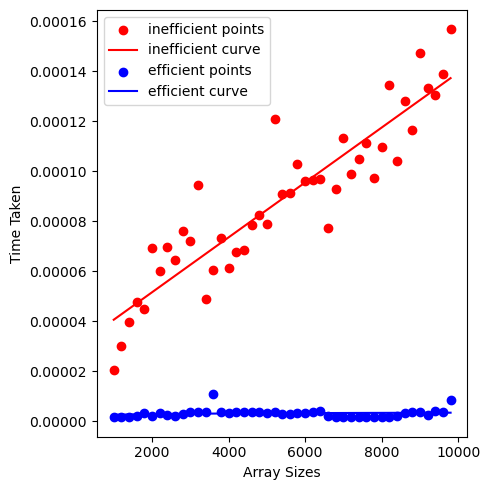

In [27]:
fig, axs = plt.subplots(nrows= 1, ncols= 1, figsize= (5, 5))

a = axs

a.scatter(sizes, ineff, label='inefficient points', color='red')
a.plot(sizes, linearModel(np.array(sizes), *p_ineff), label='inefficient curve', color= 'red')

a.scatter(sizes, eff, label='efficient points', color= 'blue')
a.plot(sizes, lognModel(np.array(sizes), *p_eff), label= 'efficient curve', color= 'blue')

a.set_xlabel('Array Sizes')
a.set_ylabel('Time Taken')

a.legend()

plt.tight_layout()
plt.show()